AI-Based Post-COVID Vaccination Cardiac Risk Prediction System

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [55]:
df = pd.read_csv("../data/covid_vaccine_cardiac_dataset.csv")

df.head()


,age,sex,state,covid_positive,vaccination_status,vaccine_name,number_of_doses,cardiac_arrest,time_to_event,event,diabetes,hypertension,prior_cvd
0,69,Male,Tamil Nadu,0,2,Sputnik V,2,0,75,0,1,0,0
1,32,Male,Uttar Pradesh,0,0,NaN,0,0,103,0,0,1,0
2,89,Female,Delhi,0,0,Sputnik V,0,0,297,1,0,1,0
3,78,Male,Maharashtra,0,2,Covishield,1,0,178,0,0,0,0
4,38,Male,Tamil Nadu,1,2,Covaxin,2,0,215,1,0,1,0


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 1000 non-null   int64 
 1   sex                 1000 non-null   object
 2   state               1000 non-null   object
 3   covid_positive      1000 non-null   int64 
 4   vaccination_status  1000 non-null   int64 
 5   vaccine_name        731 non-null    object
 6   number_of_doses     1000 non-null   int64 
 7   cardiac_arrest      1000 non-null   int64 
 8   time_to_event       1000 non-null   int64 
 9   event               1000 non-null   int64 
 10  diabetes            1000 non-null   int64 
 11  hypertension        1000 non-null   int64 
 12  prior_cvd           1000 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 101.7+ KB


In [57]:
df.describe()


,age,covid_positive,vaccination_status,number_of_doses,cardiac_arrest,time_to_event,event,diabetes,hypertension,prior_cvd
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,52.881000,0.408000,1.00000,1.506000,0.04200,185.416000,0.16300,0.266000,0.336000,0.19200
std,20.958915,0.491709,0.81281,1.095063,0.20069,104.348721,0.36955,0.442085,0.472575,0.39407
min,18.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.00000
25%,34.750000,0.000000,0.00000,1.000000,0.00000,99.000000,0.00000,0.000000,0.000000,0.00000
50%,52.500000,0.000000,1.00000,2.000000,0.00000,188.000000,0.00000,0.000000,0.000000,0.00000
75%,71.000000,1.000000,2.00000,2.000000,0.00000,277.250000,0.00000,1.000000,1.000000,0.00000
max,89.000000,1.000000,2.00000,3.000000,1.00000,364.000000,1.00000,1.000000,1.000000,1.00000


In [58]:
df.isnull().sum()


age                     0
sex                     0
state                   0
covid_positive          0
vaccination_status      0
vaccine_name          269
number_of_doses         0
cardiac_arrest          0
time_to_event           0
event                   0
diabetes                0
hypertension            0
prior_cvd               0
dtype: int64

In [59]:
df = df.drop(columns=["state", "time_to_event", "event"])


In [60]:
df = df.dropna()


In [61]:
encoders = {}

categorical_cols = [
    "sex",
    "covid_positive",
    "vaccination_status",
    "vaccine_name"
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [62]:
joblib.dump(encoders, "../model/encoders.pkl")


['../model/encoders.pkl']

In [63]:
X = df.drop(columns=["cardiac_arrest"])
y = df["cardiac_arrest"]

X.head()


,age,sex,covid_positive,vaccination_status,vaccine_name,number_of_doses,diabetes,hypertension,prior_cvd
0,69,1,0,2,2,2,1,0,0
2,89,0,0,0,2,0,0,1,0
3,78,1,0,2,1,1,0,0,0
4,38,1,1,2,0,2,0,1,0
5,41,1,0,0,2,2,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [65]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
y_pred = model.predict(X_test)


In [67]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9659863945578231


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

lr_params = {
    "model__C": [0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_params,
    cv=5,
    scoring="accuracy"
)

lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_

lr_pred = lr_best.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)


In [71]:
rf_model = RandomForestClassifier()

rf_params = {
    "n_estimators": [200,300,400],
    "max_depth": [8,10,12,None],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2]
}

rf_grid = GridSearchCV(
    rf_model,
    rf_params,
    cv=5,
    scoring="accuracy"
)

rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_

rf_pred = rf_best.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)


                 Model  Accuracy
0  Logistic Regression  0.972789
1        Random Forest  0.972789


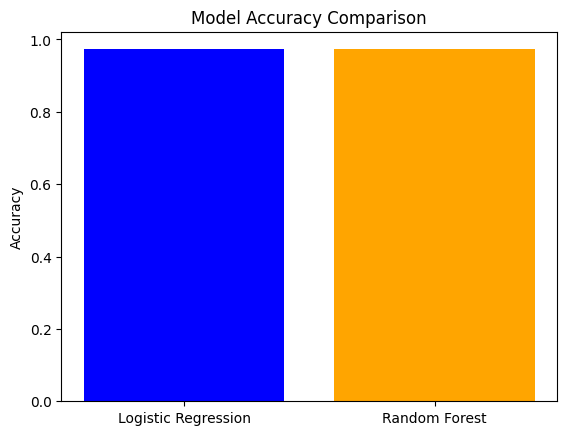

In [72]:
results = pd.DataFrame({
    "Model":["Logistic Regression","Random Forest"],
    "Accuracy":[lr_acc, rf_acc]
})

print(results)

plt.figure()
colors = ["blue", "orange"]
plt.bar(results["Model"], results["Accuracy"],color=colors)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

plt.show()


In [73]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[142   1]
 [  4   0]]


In [74]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.00      0.00      0.00         4

    accuracy                           0.97       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.95      0.97      0.96       147



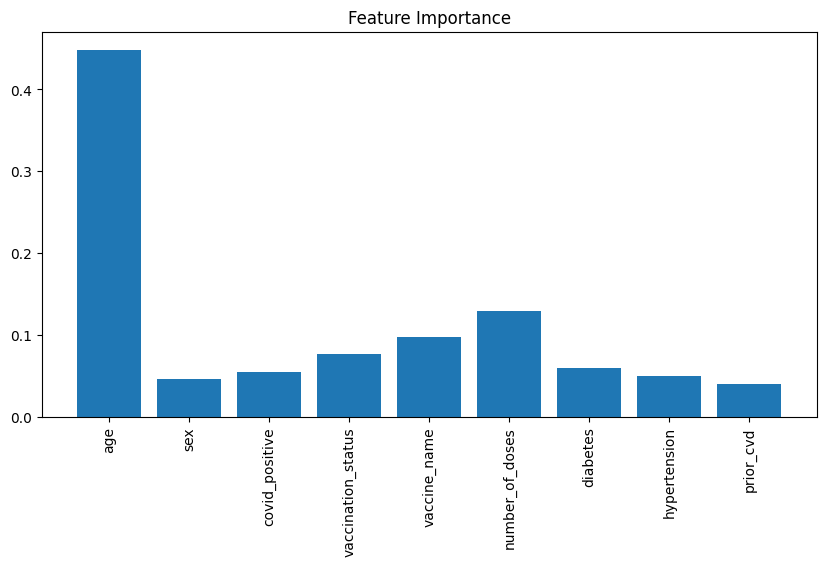

In [75]:
importances = model.feature_importances_

plt.figure(figsize=(10,5))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()


In [76]:
joblib.dump(model, "../model/cardiac_model.pkl")


['../model/cardiac_model.pkl']

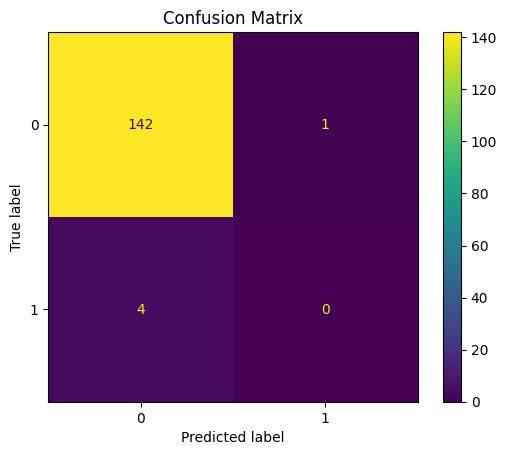

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Confusion Matrix")
plt.show()


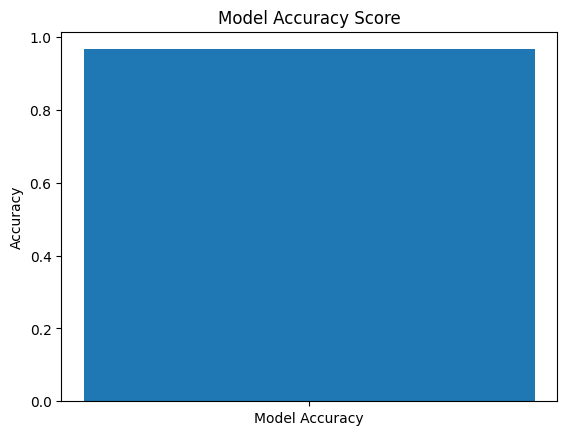

In [78]:
accuracy = accuracy_score(y_test, y_pred)

plt.figure()
plt.bar(["Model Accuracy"], [accuracy])

plt.title("Model Accuracy Score")
plt.ylabel("Accuracy")

plt.show()


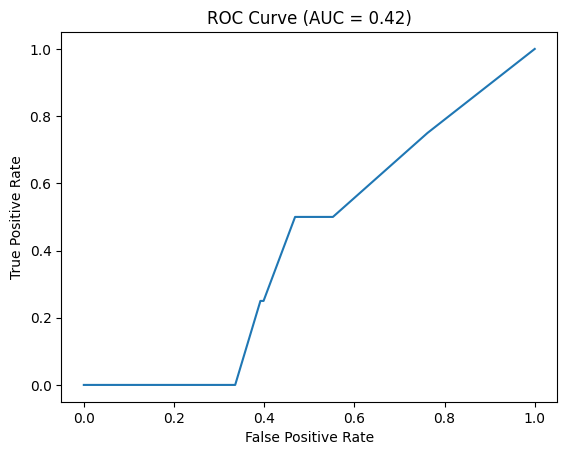

In [79]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")

plt.show()


In [80]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt


In [83]:
y_scores = model.predict_proba(X_test)[:,1]


In [84]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

avg_precision = average_precision_score(y_test, y_scores)

print("Average Precision Score:", avg_precision)


Average Precision Score: 0.025131491383738852


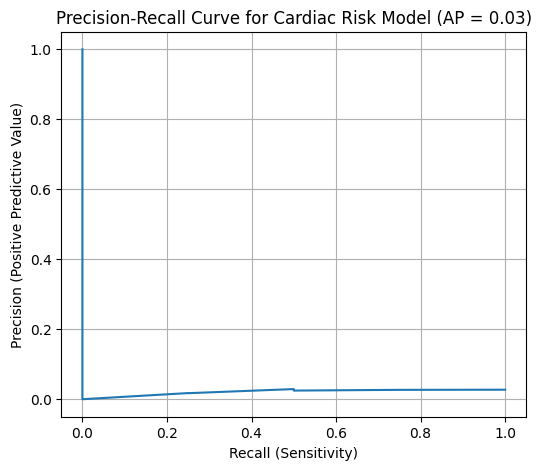

In [85]:
plt.figure(figsize=(6,5))

plt.plot(recall, precision)

plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision (Positive Predictive Value)")

plt.title(f"Precision-Recall Curve for Cardiac Risk Model (AP = {avg_precision:.2f})")

plt.grid(True)

plt.show()


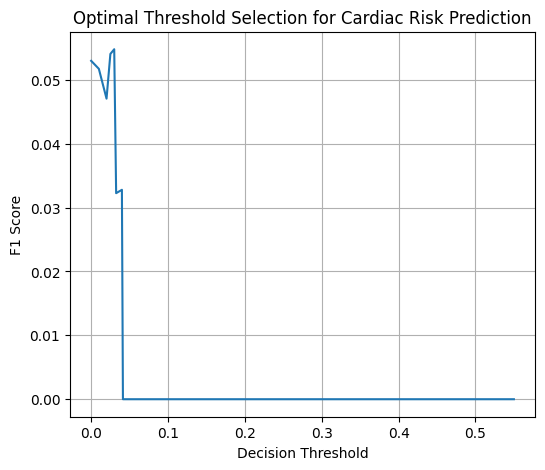

In [86]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

plt.figure(figsize=(6,5))
plt.plot(thresholds, f1_scores[:-1])

plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")

plt.title("Optimal Threshold Selection for Cardiac Risk Prediction")

plt.grid(True)
plt.show()


In [87]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt


In [88]:
df_survival = pd.read_csv("../data/covid_vaccine_cardiac_dataset.csv")


In [89]:
df_survival.columns


Index(['age', 'sex', 'state', 'covid_positive', 'vaccination_status',
       'vaccine_name', 'number_of_doses', 'cardiac_arrest', 'time_to_event',
       'event', 'diabetes', 'hypertension', 'prior_cvd'],
      dtype='object')

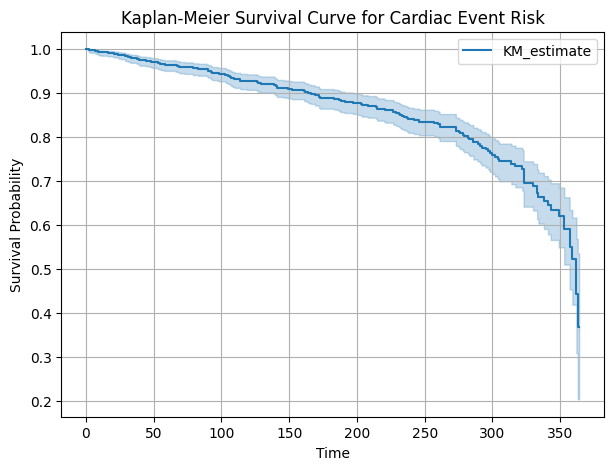

In [90]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(7,5))

kmf.fit(
    durations=df_survival["time_to_event"],
    event_observed=df_survival["event"]
)

kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve for Cardiac Event Risk")
plt.xlabel("Time")
plt.ylabel("Survival Probability")

plt.grid(True)

plt.show()


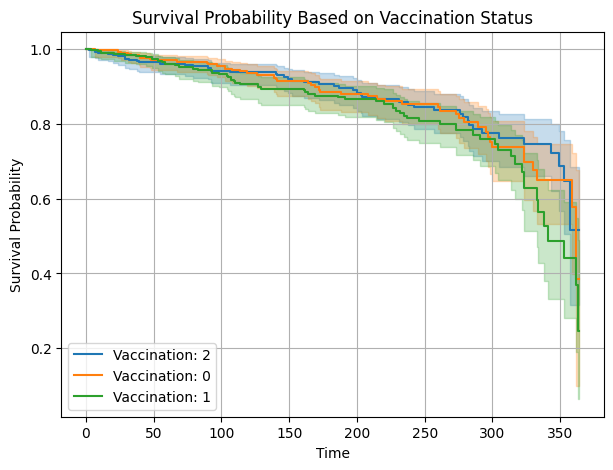

In [91]:
plt.figure(figsize=(7,5))

for status in df_survival["vaccination_status"].unique():

    subset = df_survival[df_survival["vaccination_status"] == status]

    kmf.fit(
        durations=subset["time_to_event"],
        event_observed=subset["event"],
        label=f"Vaccination: {status}"
    )

    kmf.plot_survival_function()

plt.title("Survival Probability Based on Vaccination Status")
plt.xlabel("Time")
plt.ylabel("Survival Probability")

plt.grid(True)

plt.show()


In [92]:
cox_df = df_survival.copy()


cox_df = cox_df.dropna()


cox_df["sex"] = encoders["sex"].transform(cox_df["sex"])
cox_df["covid_positive"] = encoders["covid_positive"].transform(cox_df["covid_positive"])
cox_df["vaccination_status"] = encoders["vaccination_status"].transform(cox_df["vaccination_status"])
cox_df["vaccine_name"] = encoders["vaccine_name"].transform(cox_df["vaccine_name"])


cox_df = cox_df.drop(columns=["state","cardiac_arrest"])


In [93]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

cph.fit(
    cox_df,
    duration_col="time_to_event",
    event_col="event"
)

cph.print_summary()


<lifelines.CoxPHFitter: fitted with 731 total observations, 617 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 731
number of events observed = 114
   partial log-likelihood = -652.78
         time fit was run = 2026-02-12 03:44:40 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
age                 0.00      1.00      0.00           -0.01            0.01                0.99                1.01
sex                 0.09      1.09      0.19           -0.29            0.46                0.75                1.59
covid_positive      0.22      1.24      0.19           -0.15            0.58                0.86                1.79
vaccination_status -0.10      0.90      0.11           -0.33            0.12                0.72                1.13
vaccine_name       -0.15      0.86      0.12           -0.38            0.07                0.68                1.08
number_of_doses    -0.02      0.98      0.08           -0.19            0.14                0.83                1.15
diabetes            0.05      1.05      0.21           -0.36            0.47                0.69                1.60
hypertension        0.15      1.16      0.20           -0.24            0.54                0.78                1.71
prior_cvd          -0.16      0.85      0.25           -0.66            0.33                0.52                1.39

                    cmp to     z    p  -log2(p)
covariate                                      
age                   0.00  0.58 0.56      0.84
sex                   0.00  0.46 0.65      0.63
covid_positive        0.00  1.14 0.25      1.98
vaccination_status    0.00 -0.90 0.37      1.45
vaccine_name          0.00 -1.31 0.19      2.40
number_of_doses       0.00 -0.26 0.79      0.33
diabetes              0.00  0.25 0.80      0.31
hypertension          0.00  0.74 0.46      1.12
prior_cvd             0.00 -0.64 0.52      0.94
---
Concordance = 0.57
Partial AIC = 1323.56
log-likelihood ratio test = 5.26 on 9 df
-log2(p) of ll-ratio test = 0.30

In [94]:
cox_df["vaccine_name"].unique()


array([2, 1, 0])

In [95]:
cox_df["vaccine_name"].isnull().sum()


np.int64(0)

In [96]:
cox_df = df_survival.copy()

cox_df["vaccine_name"] = cox_df["vaccine_name"].fillna("Unknown")
cox_df["sex"] = cox_df["sex"].fillna("Unknown")
cox_df["covid_positive"] = cox_df["covid_positive"].fillna("Unknown")
cox_df["vaccination_status"] = cox_df["vaccination_status"].fillna("Unknown")


for col in ["vaccine_name","sex","covid_positive","vaccination_status"]:
    known = set(encoders[col].classes_)
    cox_df[col] = cox_df[col].apply(lambda x: x if x in known else encoders[col].classes_[0])


cox_df["sex"] = encoders["sex"].transform(cox_df["sex"])
cox_df["covid_positive"] = encoders["covid_positive"].transform(cox_df["covid_positive"])
cox_df["vaccination_status"] = encoders["vaccination_status"].transform(cox_df["vaccination_status"])
cox_df["vaccine_name"] = encoders["vaccine_name"].transform(cox_df["vaccine_name"])


cox_df = cox_df.drop(columns=["state","cardiac_arrest"])


In [97]:
cph = CoxPHFitter()

cph.fit(
    cox_df,
    duration_col="time_to_event",
    event_col="event"
)

cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1000 total observations, 837 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 163
   partial log-likelihood = -968.82
         time fit was run = 2026-02-12 03:44:46 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
age                 0.00      1.00      0.00           -0.00            0.01                1.00                1.01
sex                 0.05      1.05      0.16           -0.26            0.36                0.77                1.43
covid_positive      0.18      1.19      0.16           -0.13            0.49                0.87                1.63
vaccination_status -0.03      0.97      0.10           -0.22            0.15                0.80                1.17
vaccine_name       -0.17      0.85      0.10           -0.36            0.03                0.70                1.03
number_of_doses     0.06      1.06      0.07           -0.08            0.20                0.92                1.23
diabetes           -0.12      0.88      0.18           -0.48            0.23                0.62                1.26
hypertension       -0.02      0.98      0.17           -0.35            0.31                0.70                1.36
prior_cvd          -0.26      0.77      0.22           -0.69            0.17                0.50                1.18

                    cmp to     z    p  -log2(p)
covariate                                      
age                   0.00  0.97 0.33      1.59
sex                   0.00  0.30 0.77      0.39
covid_positive        0.00  1.11 0.27      1.91
vaccination_status    0.00 -0.36 0.72      0.47
vaccine_name          0.00 -1.70 0.09      3.48
number_of_doses       0.00  0.86 0.39      1.35
diabetes              0.00 -0.68 0.49      1.02
hypertension          0.00 -0.13 0.90      0.16
prior_cvd             0.00 -1.20 0.23      2.11
---
Concordance = 0.58
Partial AIC = 1955.65
log-likelihood ratio test = 7.59 on 9 df
-log2(p) of ll-ratio test = 0.80

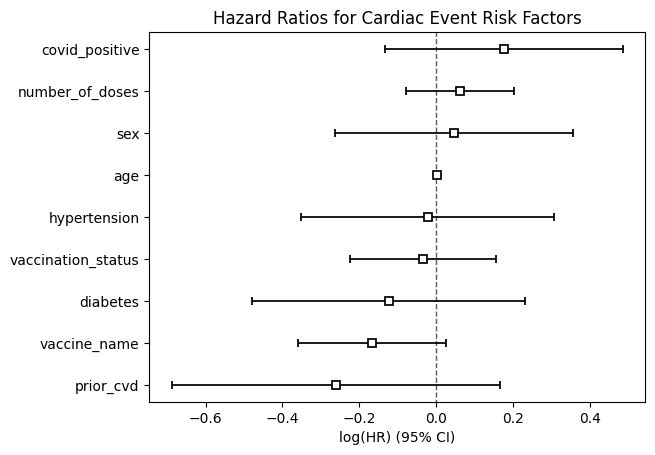

In [98]:
cph.plot()

plt.title("Hazard Ratios for Cardiac Event Risk Factors")

plt.show()


In [99]:
group1 = df[df["vaccination_status"] == 1]["age"]
group0 = df[df["vaccination_status"] == 0]["age"]

mean1 = group1.mean()
mean0 = group0.mean()

var1 = group1.var()
var0 = group0.var()

smd = (mean1 - mean0) / np.sqrt((var1 + var0)/2)

print("SMD:", smd)


SMD: 0.016184635093905598


In [100]:

def calculate_smd(df, group_col, features, group1=1, group0=0):
    smd_values = []

    for col in features:
        g1 = df[df[group_col]==group1][col]
        g0 = df[df[group_col]==group0][col]

        mean1, mean0 = g1.mean(), g0.mean()
        var1, var0 = g1.var(), g0.var()

        smd = (mean1 - mean0) / np.sqrt((var1 + var0)/2)
        smd_values.append(smd)

    return pd.DataFrame({
        "feature": features,
        "SMD": smd_values
    })


In [101]:
features = [
    "age",
    "diabetes",
    "hypertension",
    "prior_cvd",
    "number_of_doses",
    "covid_positive"
]


In [102]:
import numpy as np
import pandas as pd

def calculate_smd_mixed(df, group_col, continuous, binary, group1=1, group0=0):

    smd_list = []

    for col in continuous:
        g1 = df[df[group_col]==group1][col]
        g0 = df[df[group_col]==group0][col]

        smd = (g1.mean() - g0.mean()) / np.sqrt((g1.var() + g0.var())/2)

        smd_list.append([col, smd])

    for col in binary:
        p1 = df[df[group_col]==group1][col].mean()
        p0 = df[df[group_col]==group0][col].mean()

        smd = (p1 - p0) / np.sqrt((p1*(1-p1) + p0*(1-p0))/2)

        smd_list.append([col, smd])

    return pd.DataFrame(smd_list, columns=["feature","SMD"])


In [103]:
continuous_features = ["age","number_of_doses"]
binary_features = ["diabetes","hypertension","prior_cvd","covid_positive"]

smd_df = calculate_smd_mixed(
    df,
    group_col="vaccination_status",
    continuous=continuous_features,
    binary=binary_features
)

print(smd_df)


           feature       SMD
0              age  0.016185
1  number_of_doses  0.000000
2         diabetes  0.157709
3     hypertension -0.104909
4        prior_cvd  0.020958
5   covid_positive  0.107583


In [104]:
import numpy as np
import pandas as pd

def calculate_smd_multigroup(df, group_col, ref_group, target_group, continuous, binary):

    smd_list = []

    g1 = df[df[group_col] == target_group]
    g0 = df[df[group_col] == ref_group]

    for col in continuous:
        mean1, mean0 = g1[col].mean(), g0[col].mean()
        var1, var0 = g1[col].var(), g0[col].var()

        smd = (mean1 - mean0) / np.sqrt((var1 + var0)/2)
        smd_list.append([col, smd])

    for col in binary:
        p1 = g1[col].mean()
        p0 = g0[col].mean()

        smd = (p1 - p0) / np.sqrt((p1*(1-p1) + p0*(1-p0))/2)
        smd_list.append([col, smd])

    return pd.DataFrame(smd_list, columns=["feature","SMD"])


In [105]:
continuous_features = ["age","number_of_doses"]

binary_features = [
    "diabetes",
    "hypertension",
    "prior_cvd",
    "covid_positive"
]


In [106]:
smd_g1 = calculate_smd_multigroup(
    df,
    group_col="vaccination_status",
    ref_group=0,
    target_group=1,
    continuous=continuous_features,
    binary=binary_features
)

smd_g2 = calculate_smd_multigroup(
    df,
    group_col="vaccination_status",
    ref_group=0,
    target_group=2,
    continuous=continuous_features,
    binary=binary_features
)


In [107]:
smd_g1["Group"] = "Vaccination 1 vs Unvaccinated"
smd_g2["Group"] = "Vaccination 2 vs Unvaccinated"

smd_all = pd.concat([smd_g1, smd_g2])


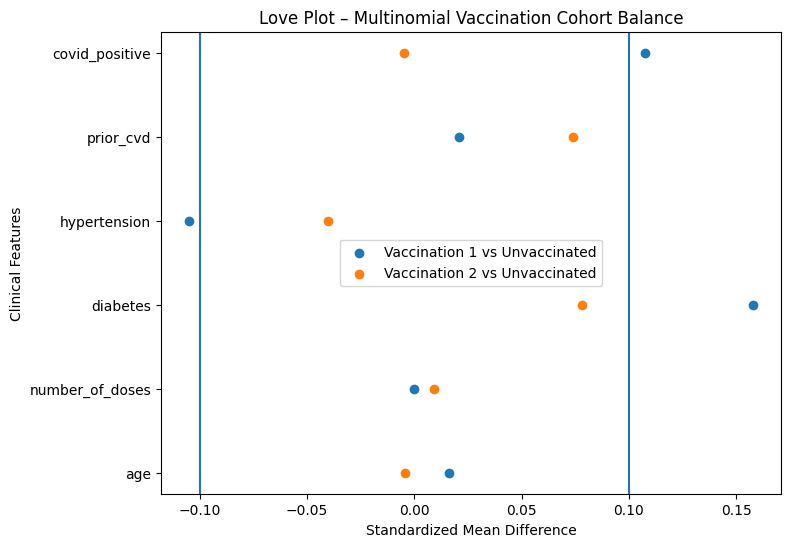

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for grp in smd_all["Group"].unique():

    subset = smd_all[smd_all["Group"] == grp]

    plt.scatter(
        subset["SMD"],
        subset["feature"],
        label=grp
    )

plt.axvline(x=0.1)
plt.axvline(x=-0.1)

plt.xlabel("Standardized Mean Difference")
plt.ylabel("Clinical Features")

plt.title("Love Plot – Multinomial Vaccination Cohort Balance")

plt.legend()

plt.show()


In [114]:
from sklearn.linear_model import LogisticRegression

df_ipw = df.copy()


T = df_ipw["vaccination_status"]


X_ps = df_ipw[[
    "age",
    "sex",
    "diabetes",
    "hypertension",
    "prior_cvd",
    "covid_positive"
]]

ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X_ps, T)

df_ipw["propensity_score"] = ps_model.predict_proba(X_ps)[:,1]


In [110]:
df_ipw["iptw_weight"] = np.where(
    df_ipw["vaccination_status"] == 1,
    1 / df_ipw["propensity_score"],
    1 / (1 - df_ipw["propensity_score"])
)


In [111]:
def smd_continuous(df, col, weight=None):
    if weight is None:
        g1 = df[df.vaccination_status==1][col]
        g0 = df[df.vaccination_status==0][col]
        return (g1.mean()-g0.mean()) / np.sqrt((g1.var()+g0.var())/2)
    else:
        w = df[weight]
        g1 = df[df.vaccination_status==1]
        g0 = df[df.vaccination_status==0]

        m1 = np.average(g1[col], weights=g1[weight])
        m0 = np.average(g0[col], weights=g0[weight])

        v1 = np.average((g1[col]-m1)**2, weights=g1[weight])
        v0 = np.average((g0[col]-m0)**2, weights=g0[weight])

        return (m1-m0)/np.sqrt((v1+v0)/2)


def smd_binary(df, col, weight=None):
    if weight is None:
        p1 = df[df.vaccination_status==1][col].mean()
        p0 = df[df.vaccination_status==0][col].mean()
    else:
        g1 = df[df.vaccination_status==1]
        g0 = df[df.vaccination_status==0]

        p1 = np.average(g1[col], weights=g1[weight])
        p0 = np.average(g0[col], weights=g0[weight])

    return (p1-p0)/np.sqrt((p1*(1-p1)+p0*(1-p0))/2)


In [113]:
table1 = []

continuous = ["age"]
binary = ["sex","diabetes","hypertension","prior_cvd"]

for col in continuous:

    before = smd_continuous(df_ipw, col)
    after = smd_continuous(df_ipw, col, weight="iptw_weight")

    table1.append([col, before, after])

for col in binary:

    before = smd_binary(df_ipw, col)
    after = smd_binary(df_ipw, col, weight="iptw_weight")

    table1.append([col, before, after])

table1_df = pd.DataFrame(
    table1,
    columns=["Characteristic","SMD Before IPTW","SMD After IPTW"]
)

print("\nTABLE 1: BASELINE CHARACTERISTICS BALANCE ")
print(table1_df)



TABLE 1: BASELINE CHARACTERISTICS BALANCE 
  Characteristic  SMD Before IPTW  SMD After IPTW
0            age         0.016185       -0.002604
1            sex        -0.206046       -0.070529
2       diabetes         0.157709        0.050123
3   hypertension        -0.104909       -0.015853
4      prior_cvd         0.020958        0.030420
